In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\iacop\\.matplotlib\\matplotlibrc'

In [4]:
from dataclasses import dataclass
@dataclass
class HarmonicOscillator():
    m : float
    k : float
    b : float = 0.
    def __post_init__(self):
        self.omega_0 = np.sqrt(self.k/self.m)
        self.beta = self.b/(2.*self.m)
        self.Q = self.omega_0/(2* self.beta)
        if self.beta < self.omega_0:
            self.type = 'underdamped'
            self.Omega = np.sqrt(self.omega_0**2-self.beta**2)
        elif self.beta > self.omega_0:
            self.type = 'overdamped'
            self.gamma = np.sqrt(-self.omega_0**2+self.beta**2)
        else:
            self.type = 'critical'

    def x(self, x0, v0, t):
        if self.type == 'underdamped':
            return np.exp(-self.beta*t) * (x0 * np.cos(self.omega_0 * t) + ((v0+self.beta*x0)/self.omega_0) *  np.sin(self.omega_0 * t))
        elif self.type == 'overdamped':
            return ((self.gamma-self.beta)*x0-v0)/(2*self.gamma) * np.exp(-(self.beta + self.gamma)*t) + ((self.gamma+self.beta)*x0+v0)/(2*self.gamma) * np.exp(-(self.beta - self.gamma)*t)
        elif self.type == 'critical':
            return (x0 + (v0 + self.beta*x0)*t)*np.exp(-self.beta*t)
    
    def v(self, x0, v0, t):
        if self.type == 'underdamped':
            return np.exp(-self.beta*t) * (v0 * np.cos(self.omega_0 * t) - (self.omega_0*x0 + (v0+self.beta*x0)*self.beta/self.omega_0) *  np.sin(self.omega_0 * t))
        elif self.type == 'overdamped':
            return -(self.beta + self.gamma)*((self.gamma-self.beta)*x0-v0)/(2*self.gamma) * np.exp(-(self.beta + self.gamma)*t) + -(self.beta - self.gamma)*((self.gamma+self.beta)*x0+v0)/(2*self.gamma) * np.exp(-(self.beta - self.gamma)*t)
        elif self.type == 'critical':
            return (v0 -self.beta*(v0 + self.beta*x0)*t)*np.exp(-self.beta*t)

    def E_c(self, x0, v0, t):
        return 0.5*self.m*self.v(x0, v0,t)**2
        
    def E_p(self, x0, v0, t):
        return 0.5*self.k*self.x(x0, v0,t)**2

    def E_m(self, x0, v0, t):
        return self.E_c(x0, v0, t) + self.E_p(x0, v0, t)        

<Figure size 510.6x315.6 with 0 Axes>

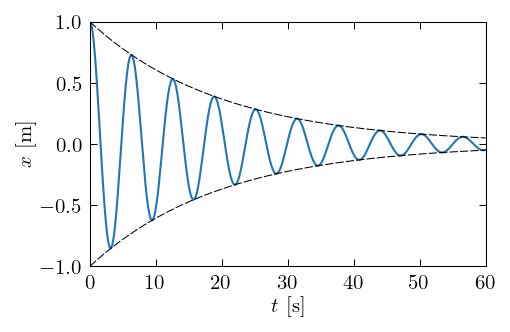

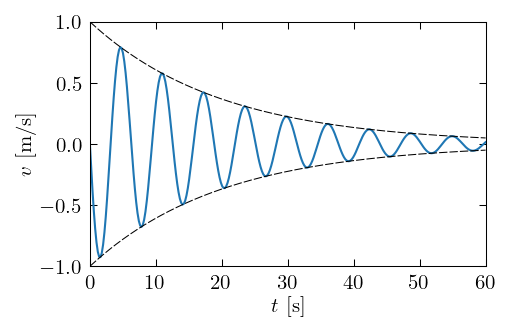

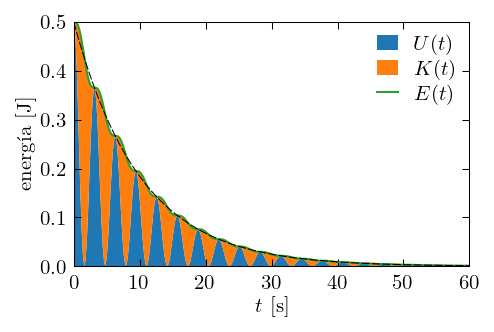

<Figure size 510.6x315.6 with 0 Axes>

In [4]:
ho = HarmonicOscillator(1,1,.1)
t=np.linspace(0,60,300)
x0 = 1
v0 = 0
x = ho.x(x0,v0,t)
v = ho.v(x0,v0,t)
E_p = ho.E_p(x0,v0,t)
E_c = ho.E_c(x0,v0,t)
E_m = ho.E_m(x0,v0,t)
plt.plot(t,x)
plt.plot(t, np.sqrt(2*E_m[0]/ho.k)*np.exp(-ho.beta*t),'k--', lw=0.5)
plt.plot(t, -np.sqrt(2*E_m[0]/ho.k)*np.exp(-ho.beta*t),'k--', lw=0.5)
plt.xlabel(r'$t~[{\rm s}]$')
plt.ylabel(r'$x~[{\rm m}]$')
plt.savefig('position_underdamped.pdf')
plt.savefig('position_underdamped.png')

plt.figure()
plt.plot(t,v)
plt.plot(t, np.sqrt(2*E_m[0]/ho.m)*np.exp(-ho.beta*t),'k--', lw=0.5)
plt.plot(t, -np.sqrt(2*E_m[0]/ho.m)*np.exp(-ho.beta*t),'k--', lw=0.5)
plt.xlabel(r'$t~[{\rm s}]$')
plt.ylabel(r'$v~[{\rm m/s}]$')
plt.savefig('velocity_underdamped.pdf')
plt.savefig('velocity_underdamped.png')
#plt.plot(t,np.gradient(x,t),'--')

plt.figure()
plt.fill_between(t,E_p, label = r'$U(t)$') 
plt.fill_between(t,E_p,E_m, label = r'$K(t)$') 
plt.plot([],[])
plt.plot([],[])
plt.plot(t, E_m, label = r'$E(t)$')
plt.plot(t, E_m[0]*np.exp(-2*ho.beta*t),'k--', lw=0.5)
plt.xlabel(r'$t~[{\rm s}]$')
plt.ylabel(r'energ\'{i}a$~[{\rm J}]$')
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='upper right')
plt.savefig('energy_underdamped.pdf')
plt.savefig('energy_underdamped.png')
plt.figure()
#plt.plot(t,E_p)
#plt.plot(t,E_c)
#plt.plot(t,E_m)
#plt.figure()
#plt.plot(x,v)

critical


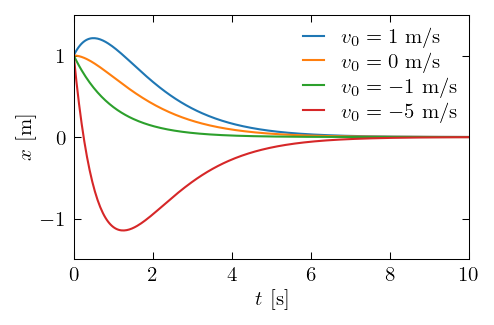

In [5]:
ho = HarmonicOscillator(1,1,2)
print(ho.type)
t=np.linspace(0,10,300)
x0 = 1
for v0 in [1,0,-1,-5]:
    x = ho.x(x0,v0,t)
    #v = ho.v(x0,v0,t)
    #E_p = ho.E_p(x0,v0,t)
    #E_c = ho.E_c(x0,v0,t)
    E_m = ho.E_m(x0,v0,t)
    plt.figure(1)
    plt.plot(t,x, label = r'$v_0 = {}$ m/s'.format(v0))
    #plt.figure(2)
    #plt.plot(t,E_m)
#plt.yscale('log')
#plt.plot(t,t*np.exp(-ho.beta*2*t),'k--')
plt.xlabel(r'$t~[{\rm s}]$')
plt.ylabel(r'$x~[{\rm m}]$')
plt.ylim(-1.5,1.5)
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='upper right')
plt.savefig('position_critical.pdf')
plt.savefig('position_critical.png')

overdamped


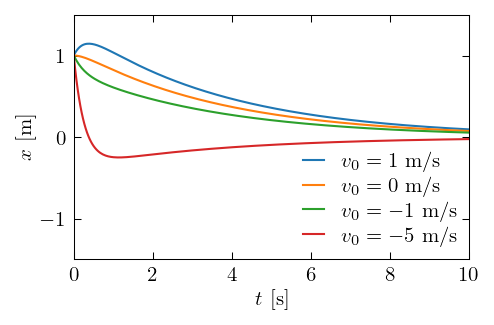

In [6]:
ho = HarmonicOscillator(1,1,4)
print(ho.type)
t=np.linspace(0,10,300)
x0 = 1
for v0 in [1,0,-1,-5]:
    x = ho.x(x0,v0,t)
    #v = ho.v(x0,v0,t)
    #E_p = ho.E_p(x0,v0,t)
    #E_c = ho.E_c(x0,v0,t)
    E_m = ho.E_m(x0,v0,t)
    plt.figure(1)
    plt.plot(t,x, label = r'$v_0 = {}$ m/s'.format(v0))
    #plt.figure(2)
    #plt.plot(t,E_m)
#plt.yscale('log')
#plt.plot(t,t*np.exp(-ho.beta*2*t),'k--')
plt.xlabel(r'$t~[{\rm s}]$')
plt.ylabel(r'$x~[{\rm m}]$')
plt.ylim(-1.5,1.5)
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='lower right')
plt.savefig('position_overdamped.pdf')
plt.savefig('position_overdamped.png')

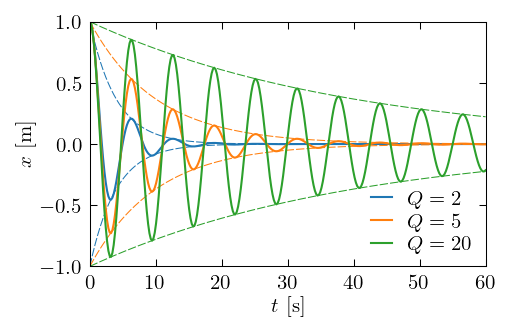

In [19]:
for Q in [2,5,20]:
    ho = HarmonicOscillator(1,1,1./Q)
    t=np.linspace(0,60,300)
    x0 = 1
    v0 = 0
    x = ho.x(x0,v0,t)
    l,= plt.plot(t,x, label = r'$Q={:g}$'.format(ho.Q))
    color = l.get_color()
    plt.plot(t, x0*np.exp(-ho.beta*t),'--', lw=0.5, color=color)
    plt.plot(t, -x0*np.exp(-ho.beta*t),'--', lw=0.5, color=color)
plt.xlabel(r'$t~[{\rm s}]$')
plt.ylabel(r'$x~[{\rm m}]$')
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='lower right')
plt.savefig('position_Q.pdf')
plt.savefig('position_Q.png')


C:\Users\iacop\AppData\Local\Temp\ipykernel_15748\2585840330.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  self.Q = self.omega_0/(2* self.beta)


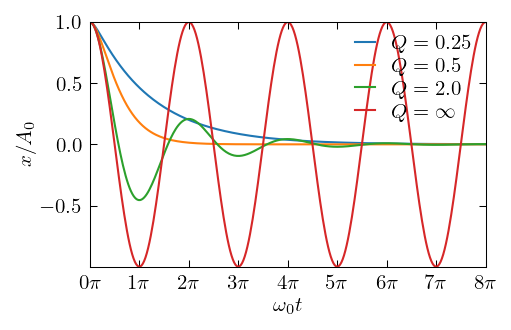

In [18]:
for Q in [0.25,0.5,2,np.inf]:
    ho = HarmonicOscillator(1,1,1./Q)
    t=np.linspace(0,8*np.pi,300)
    x0 = 1
    v0 = 0
    x = ho.x(x0,v0,t)
    if ho.Q!=np.inf:
        QQ=ho.Q
    else:
        QQ = '\\infty'
    l,= plt.plot(t,x, label = r'$Q={}$'.format(QQ))
    #color = l.get_color()
    #plt.plot(t, x0*np.exp(-ho.beta*t),'--', lw=0.5, color=color)
    #plt.plot(t, -x0*np.exp(-ho.beta*t),'--', lw=0.5, color=color)
plt.xlabel(r'$\omega_0t$')
plt.xticks(np.linspace(0,8,9)*np.pi,[r'${}\pi$'.format(i) for i in range(0,9)])
plt.ylabel(r'$x/A_0$')
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='upper right')
plt.savefig('position_Q_dimensionless.pdf')
plt.savefig('position_Q_dimensionless.png')